# 2.2

In [16]:
import pandas as pd
import torch
from torch.distributions import multinomial
import matplotlib.pyplot as plt

In [3]:
import os
os.makedirs(os.path.join('data'), exist_ok=True)
data_file = os.path.join('data', 'house_tiny.csv')

In [4]:
with open(data_file, 'w') as f:
  f.write('NumRooms,Alley,Price\n')
  f.write('NA,Pave,127500\n')  # 每行表示一个数据样本
  f.write('2,NA,106000\n')
  f.write('4,NA,178100\n')
  f.write('NA,NA,140000\n')

In [29]:
data = pd.read_csv('data/house_tiny.csv')

In [30]:
inputs, outputs = data.iloc[:, 0:2], data.iloc[:, 2]
inputs = inputs.fillna(inputs.mean(numeric_only=True))
inputs

,NumRooms,Alley
0,3.0,Pave
1,2.0,NaN
2,4.0,NaN
3,3.0,NaN


In [19]:
inputs = pd.get_dummies(inputs, dummy_na=True)
inputs

,NumRooms,Alley_Pave
0,3.0,True
1,2.0,False
2,4.0,False
3,3.0,False


In [22]:
X = torch.tensor(inputs.to_numpy(dtype=float))
y = torch.tensor(outputs.to_numpy(dtype=float))
X, y

(tensor([[3., 1.],
         [2., 0.],
         [4., 0.],
         [3., 0.]], dtype=torch.float64),
 tensor([127500., 106000., 178100., 140000.], dtype=torch.float64))

In [28]:
data = data.drop(data.count().idxmin(), axis=1)
data

,NumRooms,Price
0,NaN,127500
1,2.0,106000
2,4.0,178100
3,NaN,140000


# 2.3

$
x\in\mathbb{R}
$
标量

In [32]:
x = torch.tensor(3.0)
y = torch.tensor(2.0)
x + y, x * y, x / y, x ** y

(tensor(5.), tensor(6.), tensor(1.5000), tensor(9.))

$\mathbf{x}$ $\mathbf{y}$ 向量

In [64]:
x = torch.arange(4, dtype=torch.float32)
x

tensor([0., 1., 2., 3.])

In [34]:
x[3]

tensor(3)

In [37]:
len(x), x.shape

(4, torch.Size([4]))

$\mathbf{A} \in \mathbb{R}^{m \times n}$ 矩阵

$$[\begin{split}\mathbf{A}=\begin{bmatrix} a_{11} & a_{12} & \cdots & a_{1n} \\ a_{21} & a_{22} & \cdots & a_{2n} \\ \vdots & \vdots & \ddots & \vdots \\ a_{m1} & a_{m2} & \cdots & a_{mn} \\ \end{bmatrix}.\end{split}]$$

In [15]:
A = torch.arange(20, dtype=torch.float32).reshape(5, 4)
A / A.sum(axis=1)

RuntimeError: The size of tensor a (4) must match the size of tensor b (5) at non-singleton dimension 1

In [42]:
A.T

tensor([[ 0,  4,  8, 12],
        [ 1,  5,  9, 13],
        [ 2,  6, 10, 14],
        [ 3,  7, 11, 15]])

$\mathsf{X},\mathsf{Y},\mathsf{Z}$ 张量，矩阵的扩展：向量 = 一阶张量，矩阵 = 二阶张量

In [21]:
X = torch.arange(24).reshape(2, 3, 4)
X.sum(axis=1), X

(tensor([[12, 15, 18, 21],
         [48, 51, 54, 57]]),
 tensor([[[ 0,  1,  2,  3],
          [ 4,  5,  6,  7],
          [ 8,  9, 10, 11]],
 
         [[12, 13, 14, 15],
          [16, 17, 18, 19],
          [20, 21, 22, 23]]]))

In [46]:
Y = X.clone()
X + Y

tensor([[[ 0,  2,  4,  6],
         [ 8, 10, 12, 14],
         [16, 18, 20, 22]],

        [[24, 26, 28, 30],
         [32, 34, 36, 38],
         [40, 42, 44, 46]]])

### 降维
- 比如，对某矩阵按列求和，会将其降低为一阶张量

In [58]:
A.mean(), A.sum() / A.numel()

(tensor(7.5000), tensor(7.5000))

In [61]:
sum_A = A.sum(axis=1, keepdim=True)  # axis=1 按列
sum_A

tensor([[ 6.],
        [22.],
        [38.],
        [54.]])

### 点积 dot product

$
\mathbf{x}^\top \mathbf{y} = \sum_{i=1}^{d} x_i y_i
$

In [65]:
y = torch.ones(4, dtype=torch.float32)
x, y, torch.dot(x, y)

(tensor([0., 1., 2., 3.]), tensor([1., 1., 1., 1.]), tensor(6.))

In [66]:
# 点积的另一种算法
dot_p = torch.dot(x, y)
dot_p_1 = torch.sum(x * y)
dot_p == dot_p_1

tensor(True)

### 矩阵-向量积
$$[\begin{split}\mathbf{A}\mathbf{x} = \begin{bmatrix} \mathbf{a}^\top_{1} \\ \mathbf{a}^\top_{2} \\ \vdots \\ \mathbf{a}^\top_m \\ \end{bmatrix}\mathbf{x} = \begin{bmatrix} \mathbf{a}^\top_{1} \mathbf{x} \\ \mathbf{a}^\top_{2} \mathbf{x} \\ \vdots\\ \mathbf{a}^\top_{m} \mathbf{x}\\ \end{bmatrix}.\end{split}]$$
- A 的列维数必须与 x 的维数相同

In [69]:
A.shape, x.shape, torch.mv(A, x)

(torch.Size([5, 4]), torch.Size([4]), tensor([ 14.,  38.,  62.,  86., 110.]))

### 矩阵-矩阵乘法
$$[\begin{split}\mathbf{A}=\begin{bmatrix} a_{11} & a_{12} & \cdots & a_{1k} \\ a_{21} & a_{22} & \cdots & a_{2k} \\ \vdots & \vdots & \ddots & \vdots \\ a_{n1} & a_{n2} & \cdots & a_{nk} \\ \end{bmatrix},\quad \mathbf{B}=\begin{bmatrix} b_{11} & b_{12} & \cdots & b_{1m} \\ b_{21} & b_{22} & \cdots & b_{2m} \\ \vdots & \vdots & \ddots & \vdots \\ b_{k1} & b_{k2} & \cdots & b_{km} \\ \end{bmatrix}.\end{split}]$$
用行向量$\mathbf{a}^\top_{i} \in \mathbb{R}^k$表示矩阵$\mathbf{A}$的第$i$行，并让列向量$\mathbf{b}_{j} \in \mathbb{R}^k$作为矩阵$\mathbf{B}$的第$j$列。要生成矩阵积$\mathbf{C} = \mathbf{A}\mathbf{B}$，最简单的方法是考虑$\mathbf{A}$的行向量和$\mathbf{B}$的列向量:
$$[\begin{split}\mathbf{A}= \begin{bmatrix} \mathbf{a}^\top_{1} \\ \mathbf{a}^\top_{2} \\ \vdots \\ \mathbf{a}^\top_n \\ \end{bmatrix}, \quad \mathbf{B}=\begin{bmatrix} \mathbf{b}_{1} & \mathbf{b}_{2} & \cdots & \mathbf{b}_{m} \\ \end{bmatrix}.\end{split}]$$
当我们简单地将每个元素$c_{ij}$计算为点积$\mathbf{a}^\top_i \mathbf{b}_j$:
$$[\begin{split}\mathbf{C} = \mathbf{AB} = \begin{bmatrix} \mathbf{a}^\top_{1} \\ \mathbf{a}^\top_{2} \\ \vdots \\ \mathbf{a}^\top_n \\ \end{bmatrix} \begin{bmatrix} \mathbf{b}_{1} & \mathbf{b}_{2} & \cdots & \mathbf{b}_{m} \\ \end{bmatrix} = \begin{bmatrix} \mathbf{a}^\top_{1} \mathbf{b}_1 & \mathbf{a}^\top_{1}\mathbf{b}_2& \cdots & \mathbf{a}^\top_{1} \mathbf{b}_m \\ \mathbf{a}^\top_{2}\mathbf{b}_1 & \mathbf{a}^\top_{2} \mathbf{b}_2 & \cdots & \mathbf{a}^\top_{2} \mathbf{b}_m \\ \vdots & \vdots & \ddots &\vdots\\ \mathbf{a}^\top_{n} \mathbf{b}_1 & \mathbf{a}^\top_{n}\mathbf{b}_2& \cdots& \mathbf{a}^\top_{n} \mathbf{b}_m \end{bmatrix}.\end{split}]$$

In [70]:
B = torch.ones(4, 3)
torch.mm(A, B)

tensor([[ 6.,  6.,  6.],
        [22., 22., 22.],
        [38., 38., 38.],
        [54., 54., 54.],
        [70., 70., 70.]])

### 范数
- 向量的范数是表示向量有多大，这里的大小是指分量的大小，而非维度
- 向量范数是将向量映射到标量的函数$f$，给定任意向量$\mathbf{x}$
- L1 范数：向量元素绝对值之和，能够促进稀疏性，适用于特征选择
- L2 范数：向量元素平方和的开平方，即欧几里得距离，应用于优化问题（比如rmse），防止过拟合，提高数值稳定性（如神经网络权重初始化）
- L∞ 范数：向量元素的最大值，对抗样本防御（限制输入扰动幅度）、强化学习中的动作空间约束

In [22]:
u = torch.tensor([3.0, -4.0])
torch.norm(u)

tensor(5.)

In [23]:
torch.abs(u).sum()

tensor(7.)

In [24]:
z = torch.ones((4, 9))
z

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [25]:
torch.norm(z)

tensor(6.)

In [31]:
X = X.float()
torch.linalg.norm(X)

tensor(65.7571)

In [32]:
torch.norm(X)

tensor(65.7571)

# 2.4

$[\frac{d}{dx} \left[\frac{f(x)}{g(x)}\right] = \frac{g(x) \frac{d}{dx} [f(x)] - f(x) \frac{d}{dx} [g(x)]}{[g(x)]^2}.]$

$f'(x) = y' = \frac{dy}{dx} = \frac{df}{dx} = \frac{d}{dx} f(x) = Df(x) = D_x f(x)$
D 是微分运算符，在一元函数中，微分≈求导；在多元函数中，不等

In [34]:
import numpy as np
from matplotlib_inline import backend_inline
import matplotlib.pyplot as plt

In [40]:
def f(x):
  return 3 * x ** 2 - 4 * x

In [35]:
def use_svg_display():
  backend_inline.set_matplotlib_formats('svg')

In [36]:
def set_figsize(figsize=(3.5, 2.5)):
  use_svg_display()
  plt.rcParams['figure.figsize'] = figsize

In [37]:
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """设置matplotlib的轴"""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

In [ ]:
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """绘制数据点"""
    if legend is None:
        legend = []

    set_figsize(figsize)
    axes = axes if axes else plt.gca()

    # 如果X有一个轴，输出True
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

In [39]:
x = np.arange(0, 3, 0.1)

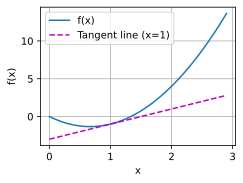

In [41]:
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

### 偏导数
设$y = f(x_1, x_2, \ldots, x_n)$，y 关于 xi 的偏导数为
 $$\frac{\partial y}{\partial x_i} = \lim_{h \rightarrow 0} \frac{f(x_1, \ldots, x_{i-1}, x_i+h, x_{i+1}, \ldots, x_n) - f(x_1, \ldots, x_i, \ldots, x_n)}{h}.$$
 $$\frac{\partial y}{\partial x_i} = \frac{\partial f}{\partial x_i} = f_{x_i} = f_i = D_i f = D_{x_i} f$$

### 梯度
- 梯度，梯度向量，即连结一个多元函数对其所有变量的偏导数
- 具体而言，设函数 $f:\mathbb{R}^n\rightarrow\mathbb{R}$ 的输入是一个 n 维向量 $\mathbf{x}=[x_1,x_2,\ldots,x_n]^\top$，并且输出是一个标量。 
- 函数 $f(\mathbf{x})$ 相对于 $\mathbf{x}$ 的梯度是一个包含 n 个偏导数的向量:
$$\nabla_{\mathbf{x}} f(\mathbf{x}) = \bigg[\frac{\partial f(\mathbf{x})}{\partial x_1}, \frac{\partial f(\mathbf{x})}{\partial x_2}, \ldots, \frac{\partial f(\mathbf{x})}{\partial x_n}\bigg]^\top$$
- 其中 $\nabla_{\mathbf{x}} f(\mathbf{x})$ 通常在没有歧义时被 $\nabla f(\mathbf{x})$ 取代
- 假设$\mathbf{x}$为$n$维向量，在微分多元函数时经常使用以下规则:
- 对于所有$\mathbf{A} \in \mathbb{R}^{m \times n}$，都有$\nabla_{\mathbf{x}} \mathbf{A} \mathbf{x} = \mathbf{A}^\top$
- 对于所有$\mathbf{A} \in \mathbb{R}^{n \times m}$，都有$\nabla_{\mathbf{x}} \mathbf{x}^\top \mathbf{A} = \mathbf{A}$
- 对于所有$\mathbf{A} \in \mathbb{R}^{n \times n}$，都有$\nabla_{\mathbf{x}} \mathbf{x}^\top \mathbf{A} \mathbf{x} = (\mathbf{A} + \mathbf{A}^\top)\mathbf{x}$
- $\nabla_{\mathbf{x}} \|\mathbf{x} \|^2 = \nabla_{\mathbf{x}} \mathbf{x}^\top \mathbf{x} = 2\mathbf{x}$
- 同样，对于任何矩阵$\mathbf{X}$，都有$\nabla_{\mathbf{X}} \|\mathbf{X} \|_F^2 = 2\mathbf{X}$。 正如我们之后将看到的，梯度对于设计深度学习中的优化算法有很大用处。

### 链式法则
- 假设可微分函数 y 有变量 $u_1, u_2, \ldots, u_m$，其中每个可微分函数 $u_i$ 都有变量 $x_1, x_2, \ldots, x_n$。 注意，y 是 $x_1, x_2， \ldots, x_n$ 的函数。 对于任意 $i = 1, 2, \ldots, n$，链式法则给出：

$$\frac{\partial y}{\partial x_i} = \frac{\partial y}{\partial u_1} \frac{\partial u_1}{\partial x_i} + \frac{\partial y}{\partial u_2} \frac{\partial u_2}{\partial x_i} + \cdots + \frac{\partial y}{\partial u_m} \frac{\partial u_m}{\partial x_i}$$

### TEST

In [43]:
def f(x):
  return x ** 3 - 1 / x

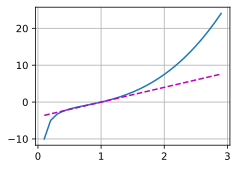

In [47]:
x = np.arange(0.1, 3, 0.1)
plot(x, [f(x), 4 * x - 4])

# 2.5 自动微分

In [52]:
x = torch.arange(4.0, requires_grad=True)
x

tensor([0., 1., 2., 3.], requires_grad=True)

In [53]:
x.grad

In [54]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [ ]:
y.backward()

In [57]:
x.grad

tensor([ 0.,  4.,  8., 12.])

In [58]:
x.grad.zero_()

tensor([0., 0., 0., 0.])

In [59]:
y = x.sum()

In [60]:
y.backward()
x.grad

tensor([1., 1., 1., 1.])

In [65]:
def f(x):
  return torch.sin(x)
x = torch.linspace(-3 * np.pi, 3 * np.pi, 100, requires_grad=True)
x1 = x.detach()
y = f(x)
y1 = f(x1)
y.sum().backward()
plot(x1, [y1, x.grad])

In [ ]:
plot(x, [y1, x.grad])

# 2.6 概率

### 大数定律
- 以骰子为例，随着投掷次数的增加，估计值（点数出现的次数除以投掷的总次数）会逐渐接近真实的潜在概率

In [12]:
fair_probs = torch.ones([6]) / 6
multinomial.Multinomial(1, fair_probs).sample()

tensor([0., 0., 1., 0., 0., 0.])

In [9]:
counts = multinomial.Multinomial(10, fair_probs).sample((500, ))
counts / 1000

tensor([0.1650, 0.1730, 0.1760, 0.1700, 0.1360, 0.1800])

In [19]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdim=True)
estimates

tensor([[0.2000, 0.0000, 0.2000, 0.2000, 0.2000, 0.2000],
        [0.1500, 0.1500, 0.1500, 0.2500, 0.2000, 0.1000],
        [0.1333, 0.1333, 0.1667, 0.2333, 0.1667, 0.1667],
        ...,
        [0.1665, 0.1691, 0.1703, 0.1651, 0.1689, 0.1602],
        [0.1663, 0.1687, 0.1701, 0.1653, 0.1689, 0.1605],
        [0.1660, 0.1690, 0.1702, 0.1652, 0.1692, 0.1604]])

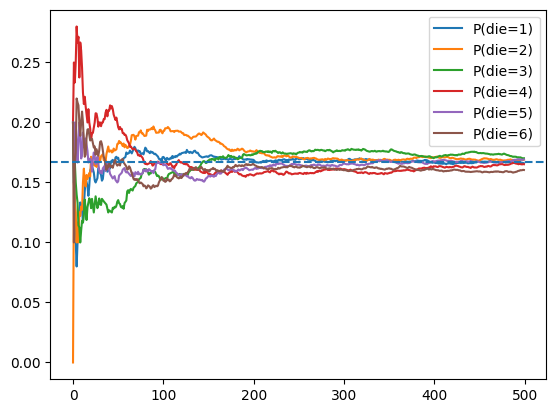

In [22]:
fig, ax = plt.subplots()
for i in range(6):
  ax.plot(estimates[:, i], label=(f'P(die={i+1})'))
plt.axhline(y=0.167, linestyle='dashed')
plt.legend()

### 概率论
- 联合概率：P(A=a, B=b)，即二者同时满足的概率，P(A=a, B=b) <= P(A=a)
- 条件概率：基于联合概率不等式，有 $0 \leq \frac{P(A=a, B=b)}{P(A=a)} \leq 1$，用 $P(B=b | A=a)$ 表示
- 贝叶斯定理：$P(A \mid B) = \frac{P(B \mid A) P(A)}{P(B)}$，$P(A, B)$ 是联合分布，等于分子，$P(A \mid B)$ 是条件分布，可在 A=a，B=b 上进行求值
- 边际化：应用求和法则，即 B 的概率相当于计算 A 的所有可能选择，并将所有选择的联合概率聚合在一起 $P(B) = \sum_A P(A, B)$，结果的概率或分布成为边际概率或边际分布
- 独立性：$A \perp B$，A 和 B 无关，可得 $ P(A \mid B) = P(A) $，其他情况即 A 和 B依赖。如果独立，根据贝叶斯定理 $ P(A \mid B) = \frac{P(A, B)}{P(B)} = P(A) $ 可得变式 $ P(A, B) = P(A) P(B) $
- 条件独立：给定另一个随机变量 $ C $ 时，两个随机变量 $ A $ 和 $ B $ 是条件独立的（conditionally independent），当且仅当 $ P(A, B \mid C) = P(A \mid C) P(B \mid C) $。这个情况表示为 $ A \perp B \mid C $

In [ ]:
### 